In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from fpcross import Solver

In [2]:
def f0(x, t):
    return -A  @ x

def f1(x, t):
    return -A @ np.ones(x.shape)

def r0(x):
    a = 2. * s
    r = np.exp(-np.sum(x*x, axis=0) / a) / (np.pi * a)**(d/2)
    return r.reshape(-1)

def rs(x):
    r = np.exp(-0.5 * np.diag(x.T @ Wi @ x))
    r/= np.sqrt(2**d * np.pi**d * np.abs(Wd))
    return r
    
d = 2
s = 0.1
D = 0.5
A = np.array([
    [1.0, 0.5],
    [0.0, 2.0],
])
W = sp.linalg.solve_lyapunov(A, 2. * D * np.eye(d))
Wi = np.linalg.inv(W)
Wd = np.linalg.det(W)

In [3]:
SL = Solver(d=d, eps=1.E-6, with_tt=False)
SL.set_funcs(f0, f1, r0, None, rs)
SL.set_coefs(D)
SL.set_grid_t(600, 0., 6., t_hst=10)
SL.set_grid_x(61, -3., 3.)
SL.prep()
SL.calc()
SL.info()

print('|| rhs_calc || / || rho_calc || = %-8.2e'%SL._calc_rhs())
print('|| rhs_stat || / || rho_stat || = %-8.2e'%SL._calc_rhs(t=100., is_stat=True))

Solve: 100%|███| 599/599 [01:34<00:00,  5.87step/s, | At T=6.0e+00 : es=1.9e+01]


----------- Solver
Format    : 2D, NP [order=2]
Grid t    : poi =       600, min =    0.0000, max =    6.0000
Grid x    : poi =        61, min =   -3.0000, max =    3.0000
Time sec  : prep = 2.10e-01, calc = 9.34e+01, spec = 8.72e-01
Err stat  : 1.90e+01
|| rhs_calc || / || rho_calc || = 2.30e-03
|| rhs_stat || / || rho_stat || = 3.75e-13


Norm calc : 6.08e+01
Norm stat : 6.07e+01
Angle cos : 1.00e+00
Angle phi : 5.87e-04


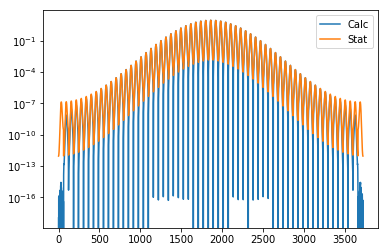

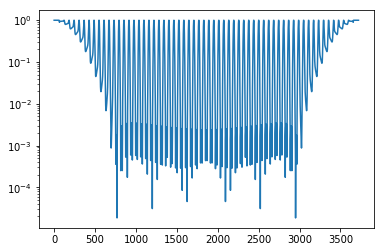

In [9]:
X = SL.IT.grid()
r_calc = SL.comp(X)
r_stat = SL.func_rs(X) * 20.

e = np.abs(r_calc - r_stat) / np.abs(r_stat)
c = np.dot(r_calc, r_stat) / np.linalg.norm(r_calc) / np.linalg.norm(r_stat)
a = np.arccos(np.clip(c, -1, 1))

print('Norm calc : %-8.2e'%np.linalg.norm(r_calc))
print('Norm stat : %-8.2e'%np.linalg.norm(r_stat))
print('Angle cos : %-8.2e'%c)
print('Angle phi : %-8.2e'%a)

x = np.arange(r_calc.size)

plt.plot(x, r_calc, label='Calc')
plt.plot(x, r_stat, label='Stat')
plt.legend(loc='best')
plt.semilogy()
plt.show()

plt.plot(x, e)
plt.semilogy()
plt.show()

In [10]:
np.linalg.norm(r_calc - r_stat) / np.linalg.norm(r_stat)

0.002304479191036813

In [11]:
np.min(r_calc / r_stat)

-9.590804171038015e-05

In [12]:
np.max(r_calc / r_stat)

1.0034604171246493

In [13]:
np.linalg.norm(r_calc) / np.linalg.norm(r_stat)

1.0022281841522491